In [2]:
from google.colab import drive
drive.mount('/content/drive') #untuk menghungungkan googlecollab dengan dataset yang ada di drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd #printah untuk mengambil library pandas

# Tentukan path ke file CSV atau dataset lainnya di Google Drive Anda
file_path = "/content/drive/MyDrive/dataset/simplelinearregression.csv" #pemanggilan dataset yang berada pada drive

# Baca dataset menggunakan pandas
df = pd.read_csv(file_path) #membaca dataset

# Tampilkan beberapa baris pertama dari dataset
print(df.head()) #menampilkan dataset pada 5 baris awal


   Age  Premium
0   18    10000
1   22    15000
2   23    18000
3   26    21000
4   28    24000


In [12]:
df #menampilkan dataset 5 baris awal dan 5 baris akhir

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Premium'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Premium'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Age', 'Premium']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Age', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Premium', 'count()', None], **{})
chart

In [13]:
df.head(7) #menampilkan 7 dataset awal

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [14]:
df.info() #menampilkan info yang ada pada setiap dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [15]:
df.describe()

,Age,Premium
count,7.000000,7.000000
mean,25.857143,20214.285714
std,5.273474,6283.955382
min,18.000000,10000.000000
25%,22.500000,16500.000000
50%,26.000000,21000.000000
75%,29.500000,25250.000000
max,33.000000,27000.000000


In [17]:
import seaborn as sns #memanggil library seaborn
import matplotlib.pyplot as plt #memanggil library matplotlib

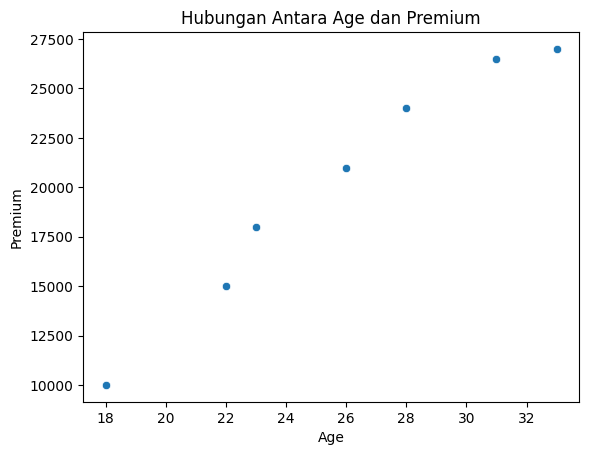

In [21]:
# Membuat scatter plot
sns.scatterplot(data=df, x="Age", y="Premium") #mamasukan dataset yang sudah ada dimasukkan sebelumnya

# Memberikan judul dan label sumbu
plt.title("Hubungan Antara Age dan Premium")
plt.xlabel("Age") #memberi label pada sumbu x
plt.ylabel("Premium") #memberi label pada sumbu y

# Menampilkan plot
plt.show()

In [25]:
# Kolom label (variabel dependen)
x = df["Age"]

# Kolom target (variabel independen)
y = df["Premium"]

In [29]:
x = np.array(x).reshape(-1, 1)
y = np.array(y)

In [27]:
import numpy as np #memanggil library numpy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

Derajat 1: MSE = 1052348.34
Derajat 2: MSE = 333666.88
Derajat 3: MSE = 194937.19
Derajat 4: MSE = 194623.87
Derajat 5: MSE = 155863.69
Derajat 6: MSE = 2.43


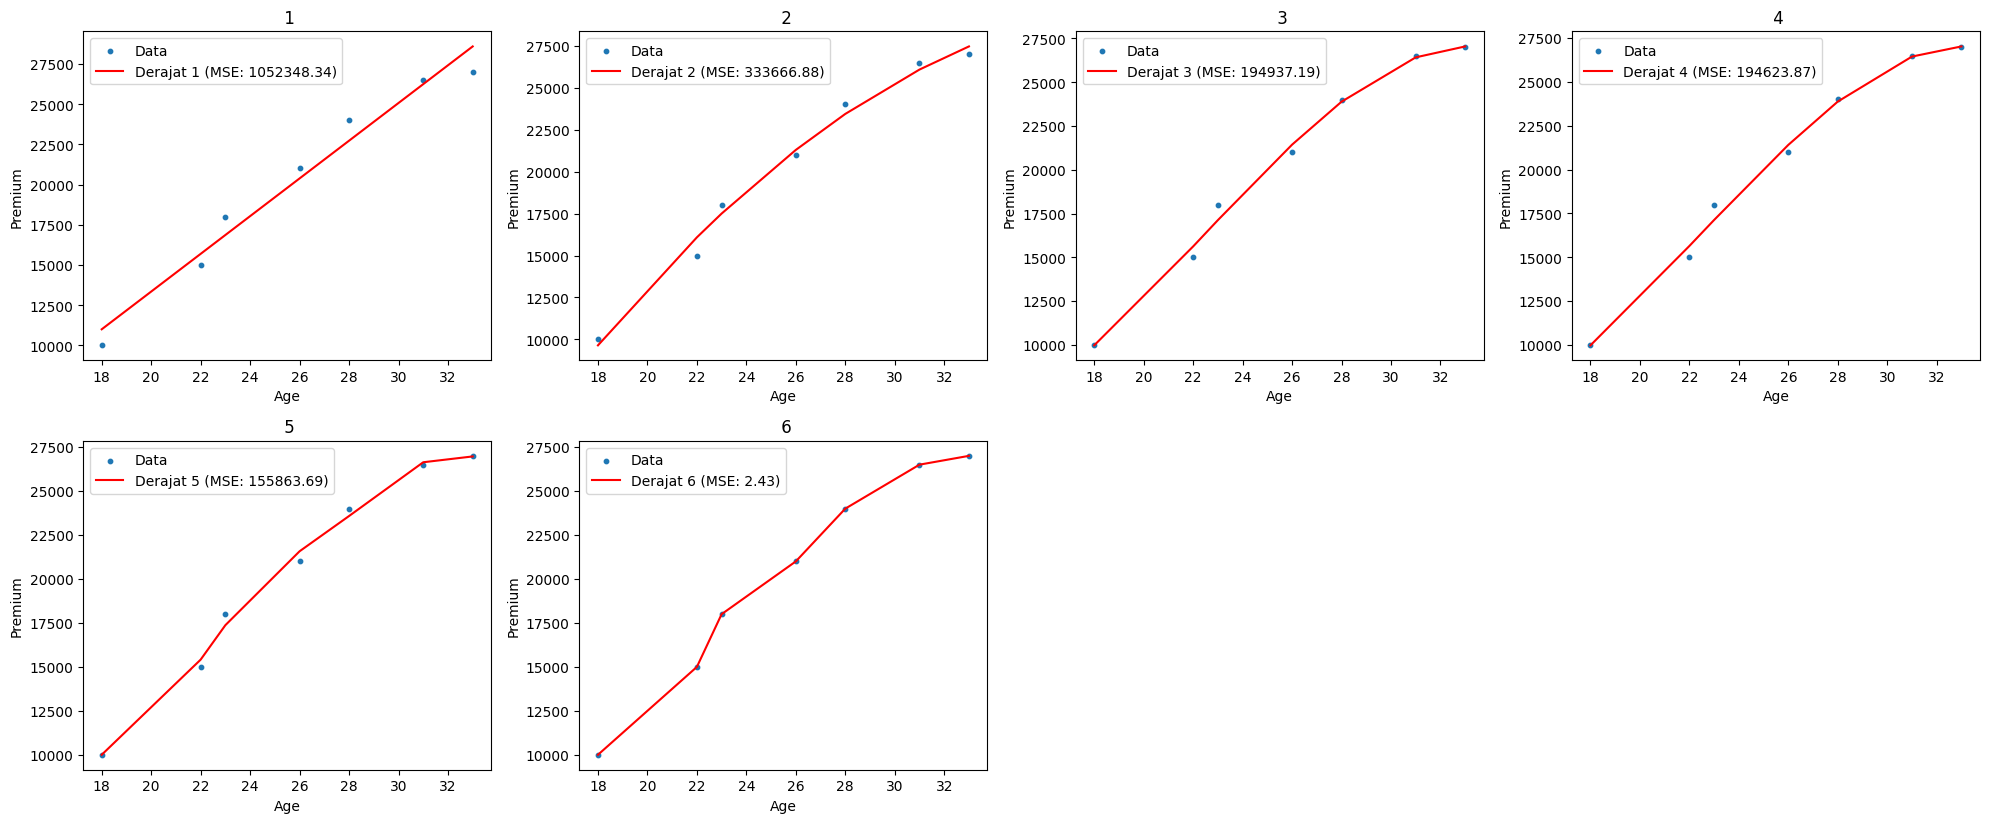

In [33]:
# Import library yang diperlukan
degrees = list(range(1, 7))  # Membuat daftar derajat polinomial
mse_values = []  # Membuat daftar untuk menyimpan nilai Mean Squared Error (MSE)
plt.figure(figsize=(20, 12))  # Mengatur ukuran gambar

# Looping melalui setiap derajat polinomial
for i, degree in enumerate(degrees):
    # Membuat fitur polinomial sesuai dengan derajat yang sedang diproses
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    # Membuat model regresi linear
    model = LinearRegression()
    model.fit(x_poly, y)

    # Melakukan prediksi menggunakan model yang telah dilatih
    y_pred = model.predict(x_poly)

    # Menghitung Mean Squared Error (MSE) antara prediksi dan data aktual
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot data asli dan hasil regresi polinomial
    plt.subplot(3, 4, i + 1)  # Membagi gambar menjadi 3 baris dan 4 kolom, memilih subplot ke-i+1
    plt.scatter(x, y, s=10, label='Data')  # Plot data asli
    plt.plot(x, y_pred, color='r', label=f'Derajat {degree} (MSE: {mse:.2f})')  # Plot hasil regresi polinomial
    plt.title(f' {degree}')
    plt.xlabel('Age')  # Label sumbu x
    plt.ylabel('Premium')  # Label sumbu y
    plt.legend()

# Mencetak MSE untuk setiap derajat polinomial
for degree, mse in zip(degrees, mse_values):
    print(f'Derajat {degree}: MSE = {mse:.2f}')

plt.tight_layout()  # Menyusun subplot agar tidak tumpang tindih
plt.show()  # Menampilkan gambar
